**Business Problem**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.



**Column Profiling**

1) Serial No. (Unique row ID)

2) GRE Scores (out of 340)

3) TOEFL Scores (out of 120)

4) University Rating (out of 5)

5) Statement of Purpose and Letter of Recommendation Strength (out of 5)

6) Undergraduate GPA (out of 10)

7) Research Experience (either 0 or 1)

8) Chance of Admit (ranging from 0 to 1)

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso

In [73]:
df = pd.read_csv("Jamboree_dataset.csv")
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


# EDA and Data Processing

In [74]:
df.shape

(500, 9)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Since the non-null count is 500 for each row and there are total 500 rows in the dataset we can conclude there are no null/empty cells in the dataset.

In [76]:
# Just to be sure.

df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [77]:
# Checking for duplicate rows.

df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [78]:
# Checking for any outliers/abnormality in any column.

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [79]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [80]:
df = df.rename(columns = {'LOR ' : 'LOR', 'Chance of Admit ' : 'Chance of Admit'})

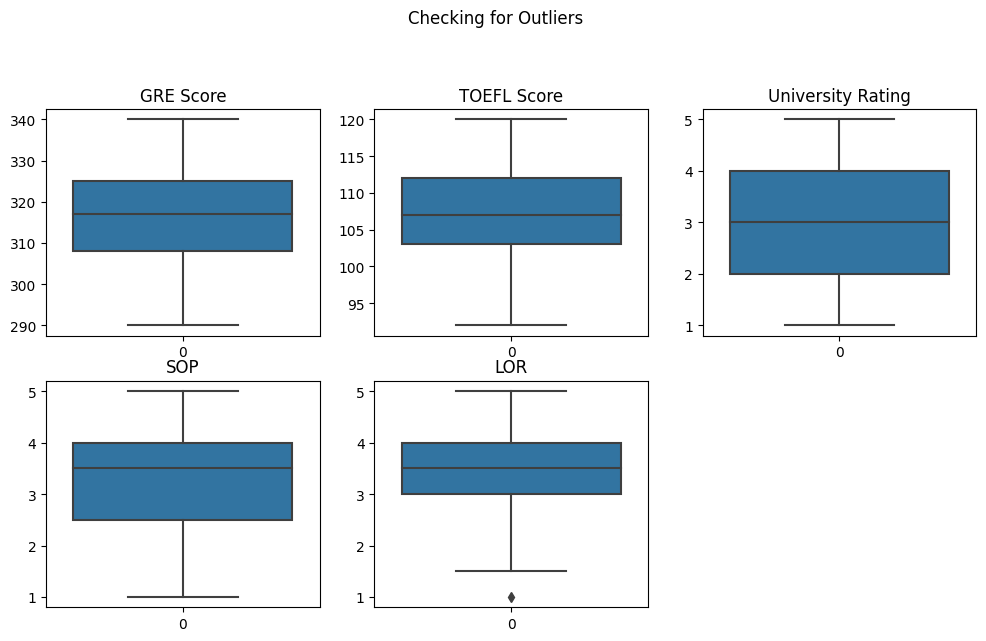

In [81]:
fig=plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.boxplot(df["GRE Score"])
plt.title("GRE Score")

plt.subplot(3,3,2)
sns.boxplot(df["TOEFL Score"])
plt.title('TOEFL Score')

plt.subplot(3,3,3)
sns.boxplot(df["University Rating"])
plt.title('University Rating')

plt.subplot(3,3,4)
sns.boxplot(df['SOP'])
plt.title('SOP')

plt.subplot(3,3,5)
sns.boxplot(df['LOR'])
plt.title('LOR')

# plt.subplot(3,3,6)
# sns.boxplot(df['Research'])
# plt.title('Research')

# plt.subplot(3,3,6)
# sns.boxplot(df['Chance of Admit'])
# plt.title('Chance of Admit')

fig.suptitle("Checking for Outliers")

plt.show()

Treating the ouliers

In [82]:
def outliers(df,ft):
    q1 = df[ft].quantile(0.25)
    q3 = df[ft].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR

    ls = df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit) ]

    return ls

In [83]:
index_list=[]
for feature in df.columns:
  index_list.extend(outliers(df,feature))

In [84]:
len(index_list)

3

In [85]:
len(sorted(set(index_list)))

3

In [86]:
def remove(df,ls):
    ls=sorted(set(ls))
    df.drop(index=ls,inplace=True)

    return df

In [87]:
df = remove(df,index_list)

In [88]:
df.reset_index(drop=True,inplace=True)

In [89]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
492,496,332,108,5,4.5,4.0,9.02,1,0.87
493,497,337,117,5,5.0,5.0,9.87,1,0.96
494,498,330,120,5,4.5,5.0,9.56,1,0.93
495,499,312,103,4,4.0,5.0,8.43,0,0.73


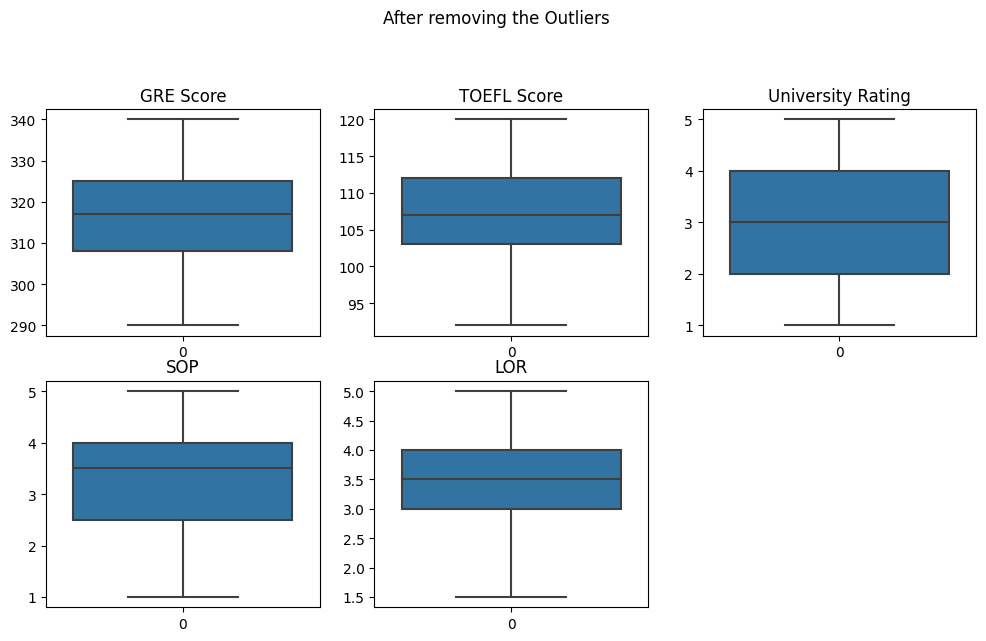

In [90]:
fig=plt.figure(figsize=(12,10))

plt.subplot(3,3,1)
sns.boxplot(df["GRE Score"])
plt.title("GRE Score")

plt.subplot(3,3,2)
sns.boxplot(df["TOEFL Score"])
plt.title('TOEFL Score')

plt.subplot(3,3,3)
sns.boxplot(df["University Rating"])
plt.title('University Rating')

plt.subplot(3,3,4)
sns.boxplot(df['SOP'])
plt.title('SOP')

plt.subplot(3,3,5)
sns.boxplot(df['LOR'])
plt.title('LOR')

# plt.subplot(3,3,6)
# sns.boxplot(df['Research'])
# plt.title('Research')

# plt.subplot(3,3,6)
# sns.boxplot(df['Chance of Admit'])
# plt.title('Chance of Admit')

fig.suptitle("After removing the Outliers")

plt.show()

In [91]:
df_copy = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit']]
df_copy

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
492,332,108,5,4.5,4.0,9.02,1,0.87
493,337,117,5,5.0,5.0,9.87,1,0.96
494,330,120,5,4.5,5.0,9.56,1,0.93
495,312,103,4,4.0,5.0,8.43,0,0.73


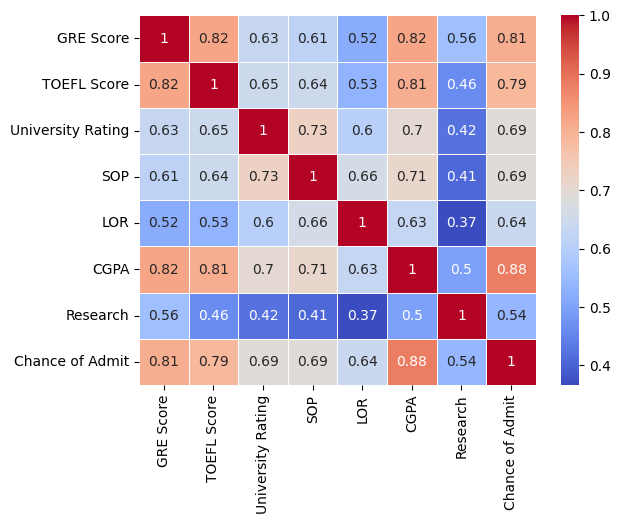

In [92]:
corr = df_copy.corr()
sns.heatmap(corr, linewidths=.5, annot=True, cmap = "coolwarm")
plt.show()

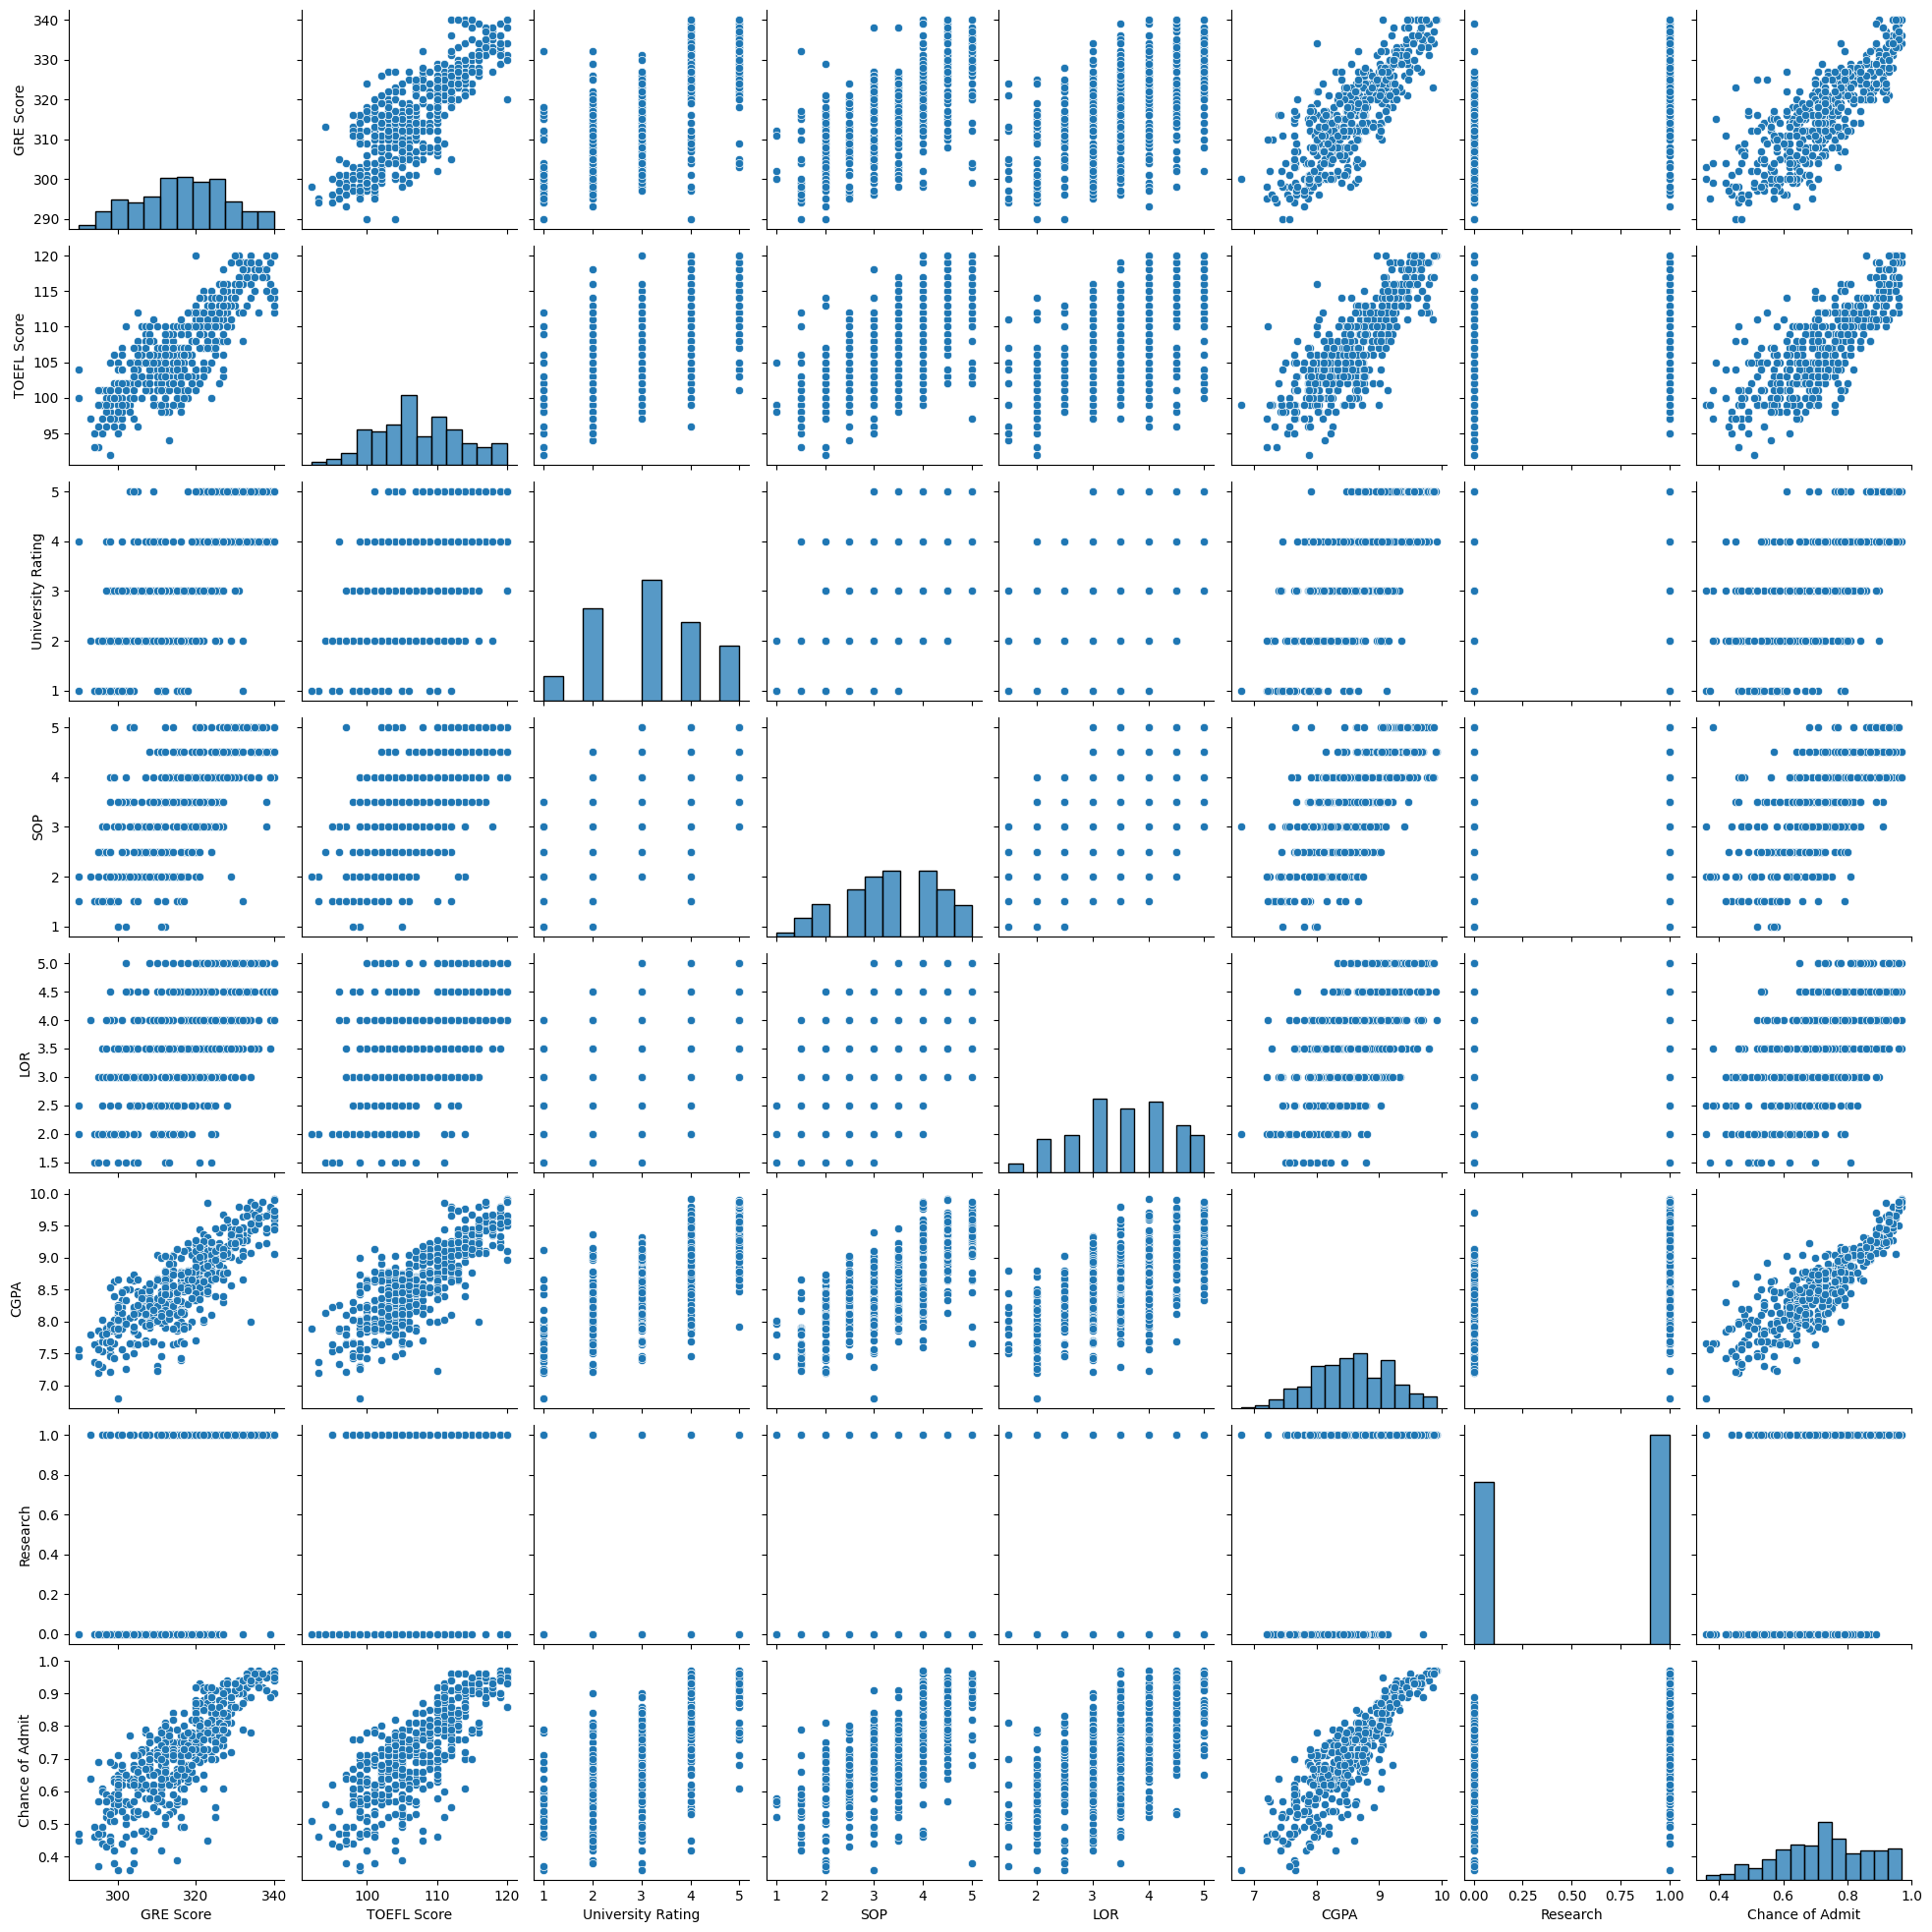

In [93]:
sns.pairplot(data = df_copy)

plt.show()

Observations on distribution and coorelation between different features :



1.   It is clear from the distributions, students with varied merit apply for the university.
2.   People with higher GRE Scores also have higher TOEFL Scores which is justified because both TOEFL and GRE have a verbal section which although not similar are relatable.
3.   Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working.
4.   LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence. Having research experience is usually related with a good LOR which might be justified by the fact that supervisors have personal interaction with the students performing research which usually results in good LORs.
5.   GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores.
6. CGPA, GRE Score & TOEFL Score are relatively highly correalted with the target variable Chance of Admit.
7. GRE Score, TOEFL Score and CGPA are also highly correalted with each other.





# Model Building

In [94]:
# Dropping Serial No. column so that the model doesn't develop a understanding on that.

df = df.drop(columns=["Serial No."])

In [95]:
X = df.drop(columns = ["Chance of Admit"])
y = df[["Chance of Admit"]]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =  1)


In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# scaler_y = MinMaxScaler()
# X_train_columns=X_train.columns
# X_train_std=scaler.fit_transform(X_train)

In [98]:
scaler.fit(X_train)


MinMaxScaler()

In [99]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [100]:
X_train_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.56,0.642857,0.00,0.375,0.571429,0.557692,1.0
1,0.50,0.285714,0.00,0.250,0.285714,0.368590,0.0
2,0.20,0.250000,0.00,0.500,0.142857,0.000000,1.0
3,0.64,0.428571,0.50,0.625,0.714286,0.653846,1.0
4,0.12,0.107143,0.25,0.500,0.142857,0.237179,1.0
...,...,...,...,...,...,...,...
392,0.38,0.250000,0.50,0.750,0.714286,0.564103,0.0
393,0.62,0.678571,1.00,1.000,1.000000,0.849359,1.0
394,0.86,0.892857,0.75,1.000,0.714286,0.916667,1.0
395,0.70,0.714286,0.75,0.750,0.857143,0.759615,1.0


In [101]:
X_test_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.62,0.607143,0.75,0.750,0.714286,0.602564,1.0
1,0.98,0.857143,0.75,0.750,0.571429,0.961538,1.0
2,0.80,1.000000,1.00,0.875,1.000000,0.884615,1.0
3,0.18,0.285714,0.50,0.250,0.142857,0.391026,0.0
4,0.68,0.678571,1.00,0.875,0.714286,0.756410,1.0
...,...,...,...,...,...,...,...
95,0.42,0.321429,0.25,0.375,0.571429,0.493590,1.0
96,0.22,0.178571,0.25,0.500,0.428571,0.346154,1.0
97,0.26,0.285714,0.25,0.500,0.571429,0.403846,1.0
98,0.54,0.428571,0.25,0.875,0.714286,0.535256,0.0


In [102]:
model = LinearRegression()
model.fit(X_train_scaled,y_train.values)

LinearRegression()

In [103]:
model.coef_

array([[0.0826894 , 0.08383598, 0.02225535, 0.0145507 , 0.05830124,
        0.37518707, 0.0220937 ]])

In [104]:
model.intercept_

array([0.35322679])

In [105]:
features = X_train.columns.to_list()
print(features)

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']


In [106]:
for i in range(1, 8):
    print(f"w{i} : ", " ", np.round(model.coef_[0][i-1],2) , " , ","feature : ", " ", features[i-1])

print("\n")
print("w0 : ", model.intercept_[0] )

w1 :    0.08  ,  feature :    GRE Score
w2 :    0.08  ,  feature :    TOEFL Score
w3 :    0.02  ,  feature :    University Rating
w4 :    0.01  ,  feature :    SOP
w5 :    0.06  ,  feature :    LOR
w6 :    0.38  ,  feature :    CGPA
w7 :    0.02  ,  feature :    Research


w0 :  0.35322678995726076


*   From all the weights its clear that which all features will have bigger impact on predictions.

*   CGPA in particular have the highest weightage among all the features.






In [107]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[0.77281088],
       [0.94989185],
       [0.9504927 ],
       [0.56186589],
       [0.84886429],
       [0.67388536],
       [0.90822317],
       [0.50807386],
       [0.62887482],
       [0.64543226],
       [0.46011119],
       [0.78502772],
       [0.72162425],
       [0.7827017 ],
       [0.95081958],
       [0.73616727],
       [0.94046678],
       [0.73430294],
       [0.71350906],
       [0.8219    ],
       [0.7205298 ],
       [0.66552274],
       [1.00079013],
       [0.58681961],
       [0.5188752 ],
       [0.77798272],
       [0.95523506],
       [0.78617364],
       [0.56512204],
       [0.64357598],
       [0.79063738],
       [0.6362231 ],
       [0.91184707],
       [0.788925  ],
       [0.75710853],
       [0.7174558 ],
       [0.62959672],
       [0.86256252],
       [0.77190091],
       [0.84997218],
       [0.60630573],
       [0.59923902],
       [0.7324683 ],
       [0.62969724],
       [0.81364739],
       [0.65634769],
       [0.61524004],
       [0.731

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_test.values,y_pred)

RMSE = np.sqrt(MSE)

print(f"Mean Squared Error : {MSE}")
print(f"Root Mean Squared Error : {RMSE}")

Mean Squared Error : 0.0033921457959251084
Root Mean Squared Error : 0.058242130763950496


In [109]:
# Trying out Lasso and Ridge regularisations

models = [['Lasso Regression :', Lasso(alpha=0.1)],
          ['Ridge Regression :', Ridge(alpha=1.0)] ]

print("Results without removing features with multicollinearity ...")

for name,model in models:
    model.fit(X_train_scaled, y_train.values)
    predictions = model.predict(X_test_scaled)
    print(f'{name} MSE : {(mean_squared_error(y_test.values, predictions))} & RMSE : {(np.sqrt(mean_squared_error(y_test, predictions)))}')


Results without removing features with multicollinearity ...
Lasso Regression : MSE : 0.01847956114181297 & RMSE : 0.13593954958661947
Ridge Regression : MSE : 0.0033885760530953644 & RMSE : 0.058211476987750144




*   Linear Regression model gave a MSE of 0.0034 and a RMSE of 0.058 which are within the acceptable terms.
*   Lasso Regularisation didnt have a positive impact. It reported a increase in errors, so I dont think the regularisation is helping in this case.
*   Ridge model followed the trend of the data and gave values similar to that of Linear Regression. It reduced the error values by a very small amount. It can be preferred over the Linear Regression model.





# Linear Regression using Statsmodel library

In [110]:
import statsmodels.api as sm
X_train_scaled = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train.values, X_train_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.1
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          3.45e-142
Time:                        17:23:30   Log-Likelihood:                 563.24
No. Observations:                 397   AIC:                            -1110.
Df Residuals:                     389   BIC:                            -1079.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3532      0.01

In [111]:
# Since p-value of SOP is greater than significance value of 0.05(industry standard), dropping the SOP feature.

X_train_opt = X_train_scaled.drop(columns = ["SOP"])

In [112]:
opt_model = sm.OLS(y_train.values, X_train_opt).fit()
print(opt_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     302.6
Date:                Sat, 30 Sep 2023   Prob (F-statistic):          2.48e-143
Time:                        17:23:30   Log-Likelihood:                 562.97
No. Observations:                 397   AIC:                            -1112.
Df Residuals:                     390   BIC:                            -1084.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3543      0.01

There is absolutely no change in R2 Score and Adj R2 Score even after removing a feature from the dataset.

# Testing the Assumptions of Linear Regression Model

## Checking Multi-Collinearity

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [114]:
vif = pd.DataFrame()

vif['Features'] = X_train_opt.columns

vif['VIF'] = [variance_inflation_factor(X_train_opt.values, i) for i in range(X_train_opt.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif.reset_index(drop = True, inplace = True)

vif

,Features,VIF
0,const,10.657453
1,CGPA,4.570702
2,GRE Score,4.313184
3,TOEFL Score,3.741649
4,University Rating,2.169072
5,LOR,1.890453
6,Research,1.562703


In [115]:
X_test_scaled

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.62,0.607143,0.75,0.750,0.714286,0.602564,1.0
1,0.98,0.857143,0.75,0.750,0.571429,0.961538,1.0
2,0.80,1.000000,1.00,0.875,1.000000,0.884615,1.0
3,0.18,0.285714,0.50,0.250,0.142857,0.391026,0.0
4,0.68,0.678571,1.00,0.875,0.714286,0.756410,1.0
...,...,...,...,...,...,...,...
95,0.42,0.321429,0.25,0.375,0.571429,0.493590,1.0
96,0.22,0.178571,0.25,0.500,0.428571,0.346154,1.0
97,0.26,0.285714,0.25,0.500,0.571429,0.403846,1.0
98,0.54,0.428571,0.25,0.875,0.714286,0.535256,0.0


In [116]:
X_test_scaled = sm.add_constant(X_test_scaled)

In [117]:
X_test_del=list(set(X_test_scaled.columns).difference(set(X_train_opt.columns)))

In [118]:
print(f'Dropping {X_test_del} from test set')

Dropping ['SOP'] from test set


In [119]:
X_test_opt=X_test_scaled.drop(columns=X_test_del)

In [120]:
X_test_opt

,const,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research
0,1.0,0.62,0.607143,0.75,0.714286,0.602564,1.0
1,1.0,0.98,0.857143,0.75,0.571429,0.961538,1.0
2,1.0,0.80,1.000000,1.00,1.000000,0.884615,1.0
3,1.0,0.18,0.285714,0.50,0.142857,0.391026,0.0
4,1.0,0.68,0.678571,1.00,0.714286,0.756410,1.0
...,...,...,...,...,...,...,...
95,1.0,0.42,0.321429,0.25,0.571429,0.493590,1.0
96,1.0,0.22,0.178571,0.25,0.428571,0.346154,1.0
97,1.0,0.26,0.285714,0.25,0.571429,0.403846,1.0
98,1.0,0.54,0.428571,0.25,0.714286,0.535256,0.0


In [121]:
opt_pred = opt_model.predict(X_test_opt)
opt_pred

0     0.772324
1     0.950624
2     0.952393
3     0.564225
4     0.848428
        ...   
95    0.667666
96    0.574262
97    0.617523
98    0.689178
99    0.649502
Length: 100, dtype: float64

In [122]:
print(f'MSE : {(mean_squared_error(y_test.values, opt_pred))} & RMSE : {np.sqrt(mean_squared_error(y_test.values, opt_pred))}')

MSE : 0.0034007463639842304 & RMSE : 0.058315918615625274


## Mean of Residual Error

In [123]:
y_test.values.shape

(100, 1)

In [124]:
residuals = y_test.values.flatten()-opt_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.0025925420379982692


Since the mean is very close to 0, we can conclude our optimized model is good.

## Test of Homoscedasticity

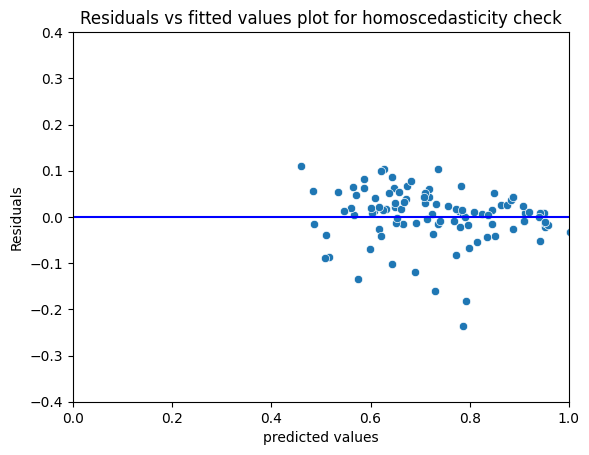

In [125]:
p = sns.scatterplot(x=opt_pred,y=residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-0.4,0.4)
plt.xlim(0,1)
p = sns.lineplot(x=[0,26], y=[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

Since the residual values are not diverging or in v-shape and are close to their mean value line, we can say that there exist no Homoscedasticity.  

## Normality of Residuals

In [126]:
# We can use Shapiro to check whether its Normal Distribution or not.

# Null Hypothesis : Normal
# Alternate Hypothesis : Not normal
# Significance Level : 5%

from scipy.stats import shapiro

t_stat, p_value = shapiro(residuals)
if p_value<0.05:
  print("Residuals do not follow Normal Distribution")
else:
  print("Residuals follow normal distribution")

Residuals do not follow Normal Distribution


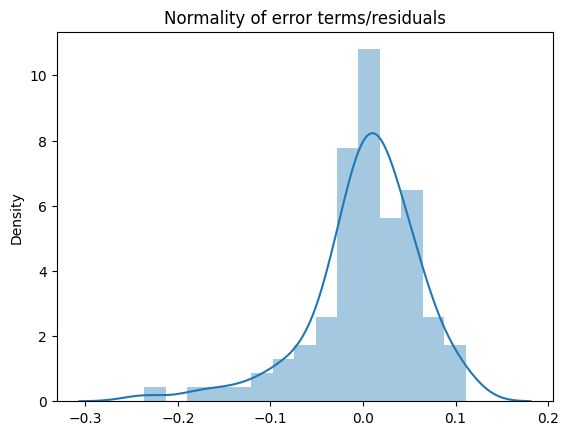

In [127]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

Text(0, 0.5, 'y_pred')

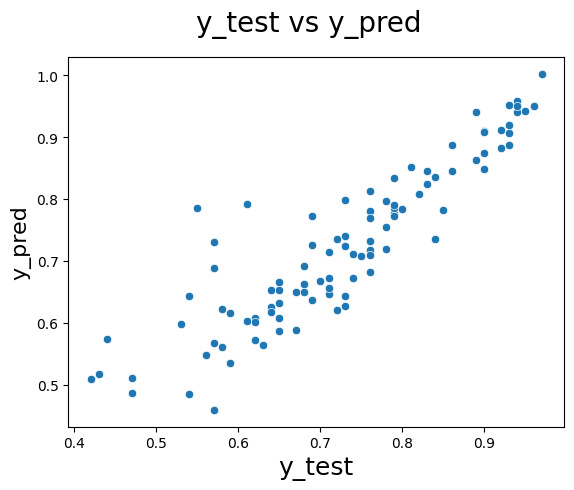

In [128]:
fig = plt.figure()
sns.scatterplot(x=y_test.values.flatten(),y = opt_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

# Insights :

*   Linear Regression model gave a MSE of 0.0034 and a RMSE of 0.058 which are within the acceptable terms.
*   Lasso Regularisation didnt have a positive impact. It reported a increase in errors, so I dont think the regularisation is helping in this case.
*   Ridge model followed the trend of the data and gave values similar to that of Linear Regression. It reduced the error values by a very small amount. It can be preferred over the Linear Regression model.


> Linear Regression : MSE: 0.0033921457959251084 RMSE : 0.058242130763950496

> Lasso Regression : MSE : 0.01847956114181297 & RMSE : 0.13593954958661947

> Ridge Regression : MSE : 0.0033885760530953644 & RMSE : 0.058211476987750144



*   CGPA has the highest weightage among all features while SOP has the least weightage.
*   Even after removing a feature based on p_value being greater than significance level the model didnt have any impact. R2 score and Adj. R2 Score both remained same.
*   Similarly the MSE and RMSE also didn't change after removing the feature.
*   Mean of residual is very close to zero. Therefore we can assume the model is performing very efficiently.
*   Also there is no homoscedasticity being observed in the residuals.
*   Error values doesn't follow a normal distribution, they are clustered around the mean value.





  





# Recommendations:



*   SOP can be subjective to evaluate and hence can be dropped as a governing feature for predicting Chance of Admit.

*   The correctness of predictions and subsequent parameters can be improved if the model is trained on bigger volume of data. So training on bigger dataset can really improve model's performance.
*   Ridge regularisation for alpha = 1 gave slightly better results than Linear Regression, therefore testing the same on bigger dataset can tell us whether the resularisation can be preferred over Linear Regression.


